Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: nan - val_loss: nan
Epoch 2/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: nan - val_loss: nan
Epoch 3/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: nan - val_loss: nan
Epoch 4/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: nan - val_loss: nan
Epoch 5/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: nan - val_loss: nan
Epoch 6/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: nan - val_loss: nan
Epoch 7/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: nan - val_loss: nan
Epoch 8/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: nan - val_loss: nan
Epoch 9/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: nan - val_loss: nan
Epoch 10/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: nan - val_loss: nan
Epoch 11/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: nan - val_loss: nan
Epoch 12/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: nan - val_loss: nan
Epoch 13/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/s

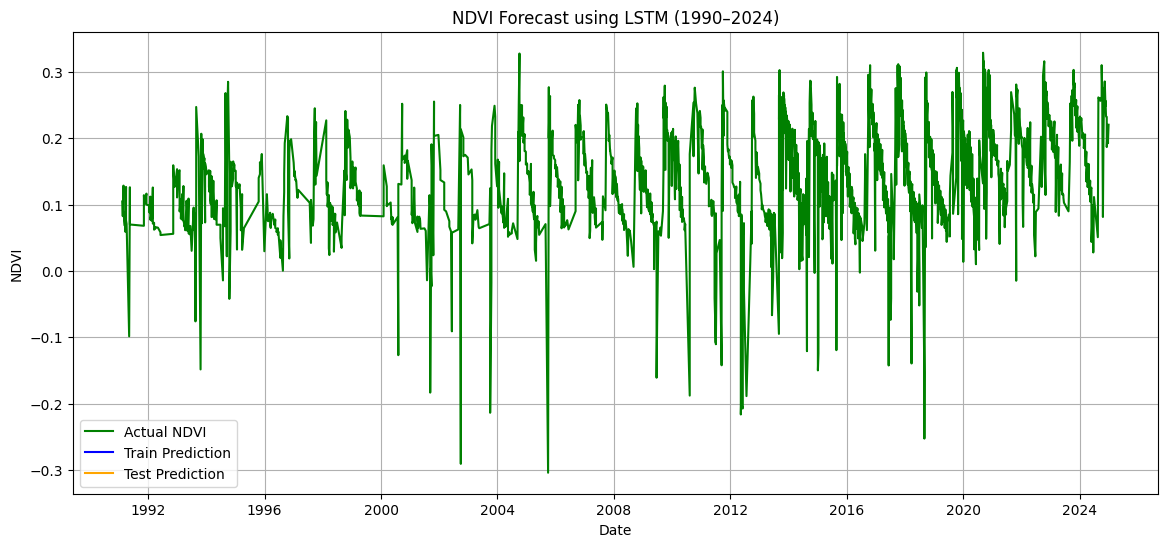

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


df = pd.read_csv('/content/NDVI_1990_2024_Aurangabad.csv')


df.rename(columns={'date': 'Date'}, inplace=True)



df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

data = df[['NDVI']]


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


def create_dataset(dataset, time_step=12):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 12
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Train/test split
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16, verbose=1)

# Predict
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
actual_y = scaler.inverse_transform(y.reshape(-1, 1))


plt.figure(figsize=(14, 6))
plt.plot(data.index[time_step + 1:], actual_y, label='Actual NDVI', color='green')
plt.plot(data.index[time_step + 1:train_size + time_step + 1], train_predict, label='Train Prediction', color='blue')
plt.plot(data.index[train_size + time_step + 1:], test_predict, label='Test Prediction', color='orange')
plt.title("NDVI Forecast using LSTM (1990–2024)")
plt.xlabel("Date")
plt.ylabel("NDVI")
plt.legend()
plt.grid()
plt.show()
